In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
path_df = "../04_Feature_Engineering/"

#Lectura del df del modelo
with (open(path_df+'dfmodelo.pickle',"rb")) as openfile:
    df = pickle.load(openfile)


In [3]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['filtered_words_lemm'],df['toxico'],test_size=0.2)

In [4]:
np.random.seed(500)

# Word Vectorization

Uno de los procesos comunes en tareas NLP es la conversión de una colección de documentos de texto en vectores de características numéricas que la máquina pueda entender. El método más popular se llama TF-IDF, su significado es "Frecuencia de Término - Frecuencia del Documento Inverso", que son los valores que finalmente se asignan a cada palabra.

Frecuencia de término: Cuanto aparece la palabra en ese documento.

Frecuencia de documentos inversa: esta escala reduce las palabras que aparecen mucho en los documentos.

fuente: https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

Dependiendo del término max_features podemos indicar el número de palabras a tener en cuenta. 

In [5]:
df.loc[38,'filtered_words']


['asco',
 'periodismo',
 'cadena',
 'perroflauta',
 'miserables',
 'personajes',
 '😠',
 '😡',
 '😠']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer 


def identity_tokenizer(text):
    return text

Tfidf_vect = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False,max_features=7000)  
Tfidf_vect.fit(df.loc[:,'filtered_words'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)


{'toda': 2810, 'gente': 1285, 'alcasser': 135, 'daba': 759, 'ostias': 2041, 'hablando': 1350, 'mal': 1742, 'programa': 2321, 'no': 1964, 'decirlos': 794, 'familiares': 1162, 'shock': 2630, 'darian': 764, 'cuenta': 740, 'haciendo': 1365, 'tiempo': 2783, 'debieron': 787, 'abrir': 69, 'ojos': 2009, 'sentir': 2606, 'aun': 274, 'mas': 1787, 'impotencia': 1479, 'respeto': 2476, 'carabinero': 471, 'potente': 2272, 'sabe': 2534, 'ahogadillas”': 117, 'playa': 2210, 'eramos': 1049, 'chicos': 543, 'mar': 1770, 'quedao': 2378, 'dia': 874, 'perroflauta': 2161, 'jajajajajajaja': 1563, 've': 2940, 'aqui': 223, 'abrazo': 65, 'cabestro': 398, 'dos': 936, 'fotos': 1225, 'juntas': 1593, 'entienden': 1028, 'mejor': 1805, 'mangurrian': 1762, '-desde': 27, 'myra': 1918, 'decidido': 788, 'ignorar': 1455, 'fantasmas': 1166, 'tocapelotas-': 2806, 'narro': 1927, 'perez': 2151, 'reverte': 2490, 'leer': 1636, 'sabes': 2539, 'callate': 426, 'bot': 364, 'hermanos': 1384, 'equilibristas': 1045, 'nik': 1950, 'lijana'

In [7]:
#print(Train_X_Tfidf)

# Naive_bayes

In [8]:
# Entrenamos los datos de training en el clasificador Naive Bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predecimos los valores de toxicidad en el modelo de validación insertadop
predictions_NB = Naive.predict(Test_X_Tfidf)

print("Accuracy Score",accuracy_score(predictions_NB, Test_Y)*100)

Accuracy Score 90.78014184397163


In [9]:
print(classification_report(Test_Y,predictions_NB))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.93      0.89      0.91        71

   micro avg       0.91      0.91      0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141



In [10]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predictions_NB)
print(cnf_matrix)

[[65  5]
 [ 8 63]]


### Dibujo de la matiz de confusión

Text(0.5,257.44,'Valor predicho')

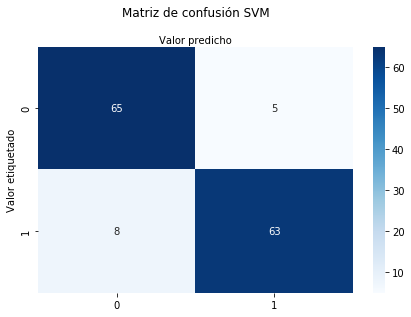

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión NB', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')

# Classifier - Algorithm - SVM

In [11]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Accuracy Score ",accuracy_score(predictions_SVM, Test_Y)*100)

Accuracy Score  92.19858156028369


In [12]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.93      0.92      0.92        71

   micro avg       0.92      0.92      0.92       141
   macro avg       0.92      0.92      0.92       141
weighted avg       0.92      0.92      0.92       141



In [14]:
#MATRIZ DE CONFUSIÓN
cnf_matrix = confusion_matrix(Test_Y,predictions_SVM)
print(cnf_matrix)

[[65  5]
 [ 6 65]]


### Dibujo de la matiz de confusión

Text(0.5,257.44,'Valor predicho')

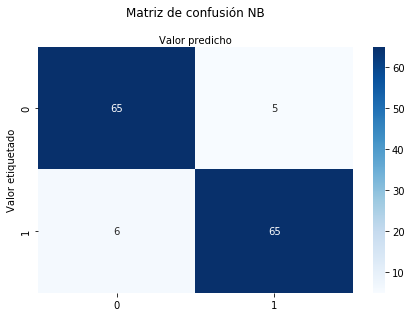

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión NB', y=1.1)
plt.ylabel('Valor etiquetado')
plt.xlabel('Valor predicho')